In [16]:
from sklearn import datasets
import numpy as np

In [17]:
iris = datasets.load_iris()
x = iris.data[:, [2, 3]]
y = iris.target
# we load 3 different iris types
print("Class labels:", np.unique(y))

Class labels: [0 1 2]


In [18]:
# seperate dataset into training set and test set
from sklearn.model_selection import train_test_split

# test_size specifies which % of the dataset shall become test_set
# stratify with respect to y means that training set and test set shall have
# the same percentages of features specified in y (in this case, labels)
x_train, x_test, y_train, y_test = train_test_split(
  x,
  y,
  test_size=0.3,
  random_state=1,
  stratify=y
)

# ensure that stratification is correct
print("Labels counts in y: ", np.bincount(y))
print("Labels counts in y_train: ", np.bincount(y_train))
print("Labels counts in y_test: ", np.bincount(y_test))


Labels counts in y:  [50 50 50]
Labels counts in y_train:  [35 35 35]
Labels counts in y_test:  [15 15 15]


In [19]:
# do the standarization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# when fit() is called, sc estimates mean and stddev
sc.fit(x_train)

x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

In [20]:
# train the perceptron
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(x_train_std, y_train);

In [21]:
# check the model on test data
from sklearn.metrics import accuracy_score

y_pred = ppn.predict(x_test_std)
print("Accuracy: ", accuracy_score(y_test, y_pred))
# equivalently
print("Accuracy: ", ppn.score(x_test_std, y_test))

Accuracy:  0.9777777777777777
Accuracy:  0.9777777777777777


In [24]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(x, y, classifier, test_idx=None, resolution=0.02):
  # setup marker generator and color map
  markers = ('o', 's', '^', 'v', '<')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])
  # plot the decision surface
  x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
  x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
  np.arange(x2_min, x2_max, resolution))
  lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  lab = lab.reshape(xx1.shape)
  plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())
  # plot class examples
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(
      x=x[y == cl, 0],
      y=x[y == cl, 1],
      alpha=0.8,
      c=colors[idx],
      marker=markers[idx],
      label=f'Class {cl}',
      edgecolor='black'
    )
  # highlight test examples
  if test_idx:
    # plot all examples
    x_test, y_test = x[test_idx, :], y[test_idx]
    plt.scatter(
      x_test[:, 0],
      x_test[:, 1],
      c='none',
      edgecolor='black',
      alpha=1.0,
      linewidth=1,
      marker='o',
      s=100,
      label='Test set'
    )

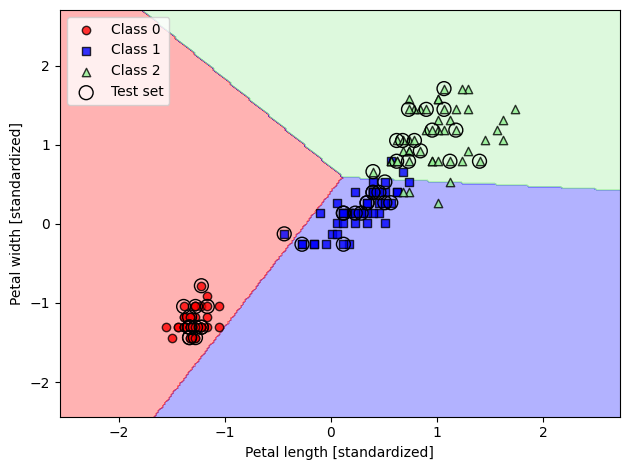

In [ ]:
# note that classifier is not perfect, since dataset is not linearily seperable
x_combined_std = np.vstack((x_train_std, x_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(
  x=x_combined_std,
  y=y_combined,
  classifier=ppn,
  test_idx=range(105, 150)
)
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()